# Simple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')


In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df['Life expectancy '].fillna(df['Life expectancy '].mean(), inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)
df[' BMI '].fillna(df[' BMI '].mean(), inplace=True)
df['Polio'].fillna(df['Polio'].mean(), inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(), inplace=True)
df['GDP'].fillna(df['GDP'].mean(), inplace=True)
df['Population'].fillna(df['Population'].mean(), inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(), inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(), inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
features=['Adult Mortality',' HIV/AIDS','Population','Alcohol','Measles ',
         'Polio','Total expenditure','Diphtheria ',' thinness  1-19 years',
         ' thinness 5-9 years','Income composition of resources','Schooling']
x=df[features].values
y=df['Life expectancy '].values

In [ ]:
x.shape

(2938, 12)

In [ ]:
y.shape

(2938,)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Training the Simple Linear Regression model on the Training set

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [62]:
y_pred = regressor.predict(X_test)

In [65]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[79.02 82.1 ]
 [57.62 58.4 ]
 [63.53 63.3 ]
 ...
 [67.11 73.1 ]
 [55.97 51.3 ]
 [62.41 58.6 ]]


In [70]:
from sklearn import metrics

In [71]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  3.2612145315081413
Mean Squared Error:  19.67110309340458
Root Mean Squared Error:  4.4352117303917495
R2 Score:  0.7722928416572948


## Visualising the  results

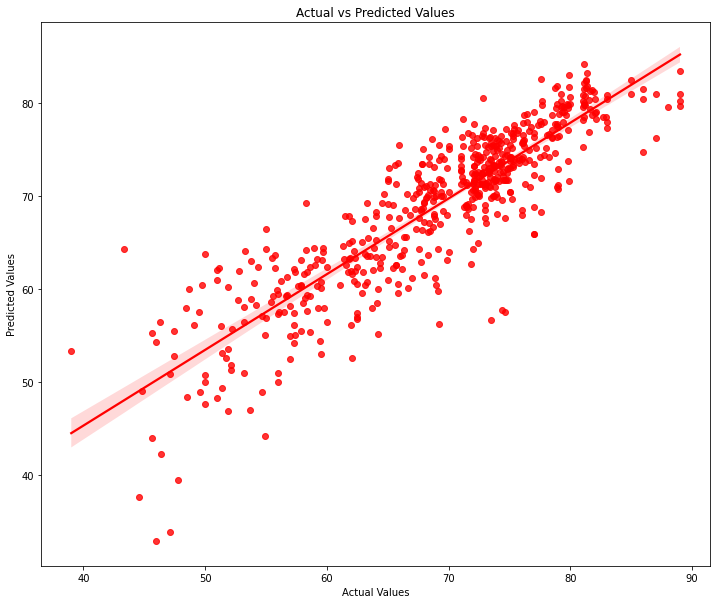

In [79]:
plt.figure(figsize=(12,10))
sns.regplot(x=y_test, y=y_pred,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()